In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from jax.example_libraries import optimizers
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
def GD(max_itr, x0, eta):
    x = x0
    for i in range(max_itr):
        x -= 2.0 * eta * x
    return x**2.0

In [3]:
#Adamオプティマイザを利用
opt_init, opt_update, get_params = optimizers.adam(0.25)

# @jax.jit
def train(eta, max_itr, train_itr):
    opt_state = opt_init(eta)
    p_log = []
    rng = jax.random.PRNGKey(0)
    x = jax.random.normal(rng)
    for i in range(train_itr):
        p = get_params(opt_state)
        p_log.append(p)
        value, grads = jax.value_and_grad(GD, argnums=-1)(max_itr, x, p)
        opt_state = opt_update(i, grads, opt_state)
    return p_log

In [4]:
eta = 0.0
train_itr = 125
p_log = train(eta, 3, train_itr)

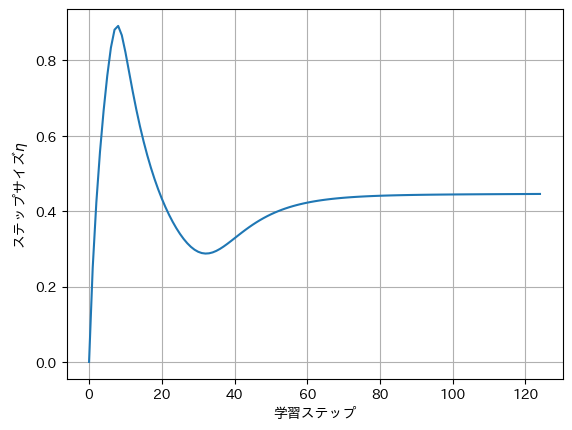

In [11]:
plt.plot(list(range(train_itr)), p_log)
plt.ylabel("ステップサイズ$\eta$")
plt.xlabel("学習ステップ")
plt.grid();